# Лабораторная работа №10. Шанаурин Антон Александрович, ЛБ-20 НЕТ
## Вариант 26

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

variant_number = 26
np.random.seed(variant_number)
noise_base = 1

# Генерация данных
n_samples = 110
X, y, coef = make_regression(n_samples=n_samples, 
                            n_features=2, 
                            n_informative=1,
                            n_targets=1, 
                            noise=noise_base,
                            coef=True,
                            random_state=variant_number)

# Выведем сгенерированные веса
print("Сгенерированные веса признаков:", coef)

# Определим, какой признак информативный
informative_feature_idx = np.argmax(np.abs(coef))
non_informative_feature_idx = 1 - informative_feature_idx

print(f"Информативным является признак с индексом {informative_feature_idx}")
print(f"Неинформативным является признак с индексом {non_informative_feature_idx}")

Сгенерированные веса признаков: [95.63263944  0.        ]
Информативным является признак с индексом 0
Неинформативным является признак с индексом 1


## 2. Определение информативного признака и уравнение регрессии

### Уравнение регрессии на основе сгенерированных весов:

$$
y = β_0 + β_1 \cdot X_1 + β_2 \cdot X_2
$$
где $β_0 = 0$ (т.к. функция make_regression не добавляет свободный член), $β_1$ и $β_2$ - сгенерированные коэффициенты.

Информативным является признак с большим по модулю значением коэффициента, а неинформативным - с нулевым или близким к нулю коэффициентом.

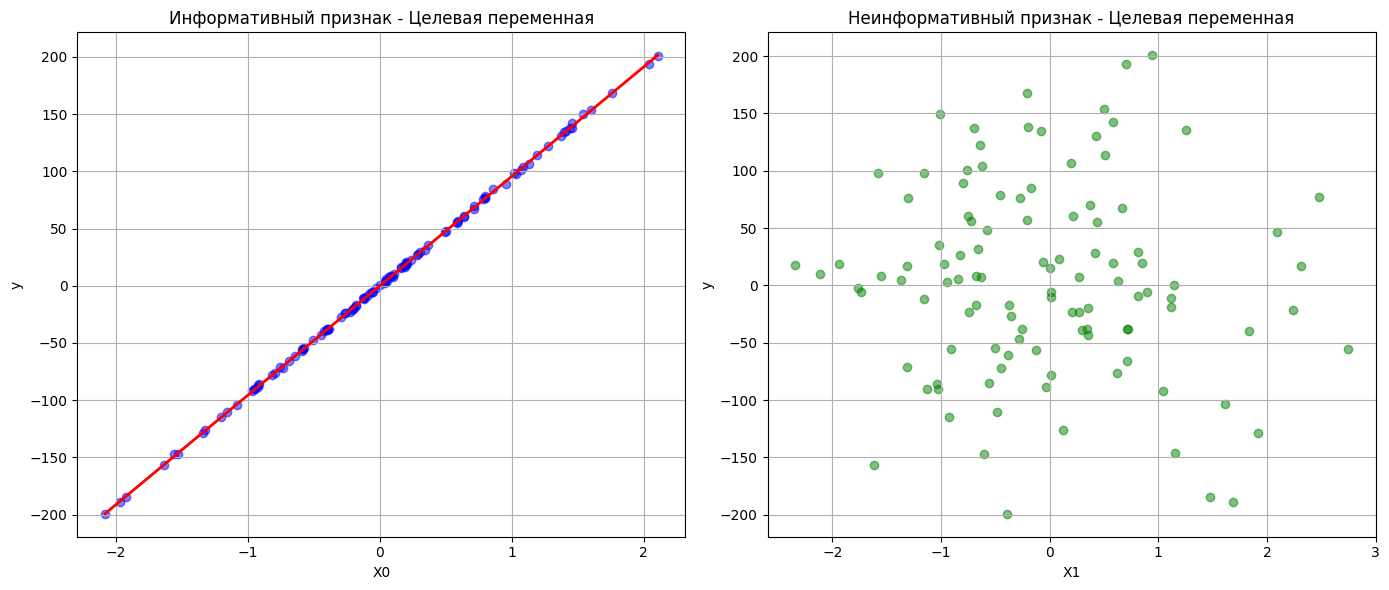

In [2]:
# Создаем две подграфика
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# График 1: Информативный признак и целевая переменная
ax1.scatter(X[:, informative_feature_idx], y, color='blue', alpha=0.5)
# Строим прямую регрессии
x_line = np.linspace(X[:, informative_feature_idx].min(), X[:, informative_feature_idx].max(), 100)
y_line = coef[informative_feature_idx] * x_line
ax1.plot(x_line, y_line, color='red', lw=2)
ax1.set_title('Информативный признак - Целевая переменная')
ax1.set_xlabel(f'X{informative_feature_idx}')
ax1.set_ylabel('y')
ax1.grid(True)

# График 2: Неинформативный признак и целевая переменная
ax2.scatter(X[:, non_informative_feature_idx], y, color='green', alpha=0.5)
ax2.set_title('Неинформативный признак - Целевая переменная')
ax2.set_xlabel(f'X{non_informative_feature_idx}')
ax2.set_ylabel('y')
ax2.grid(True)

plt.tight_layout()
plt.show()

### Комментарии к графикам:
На первом графике (информативный признак - целевая переменная) должна наблюдаться выраженная линейная зависимость. Облако точек распределяется вокруг прямой регрессии, и разброс определяется параметром шума. На втором графике (неинформативный признак - целевая переменная) не наблюдается никакой зависимости, точки распределены хаотично, без видимого тренда.

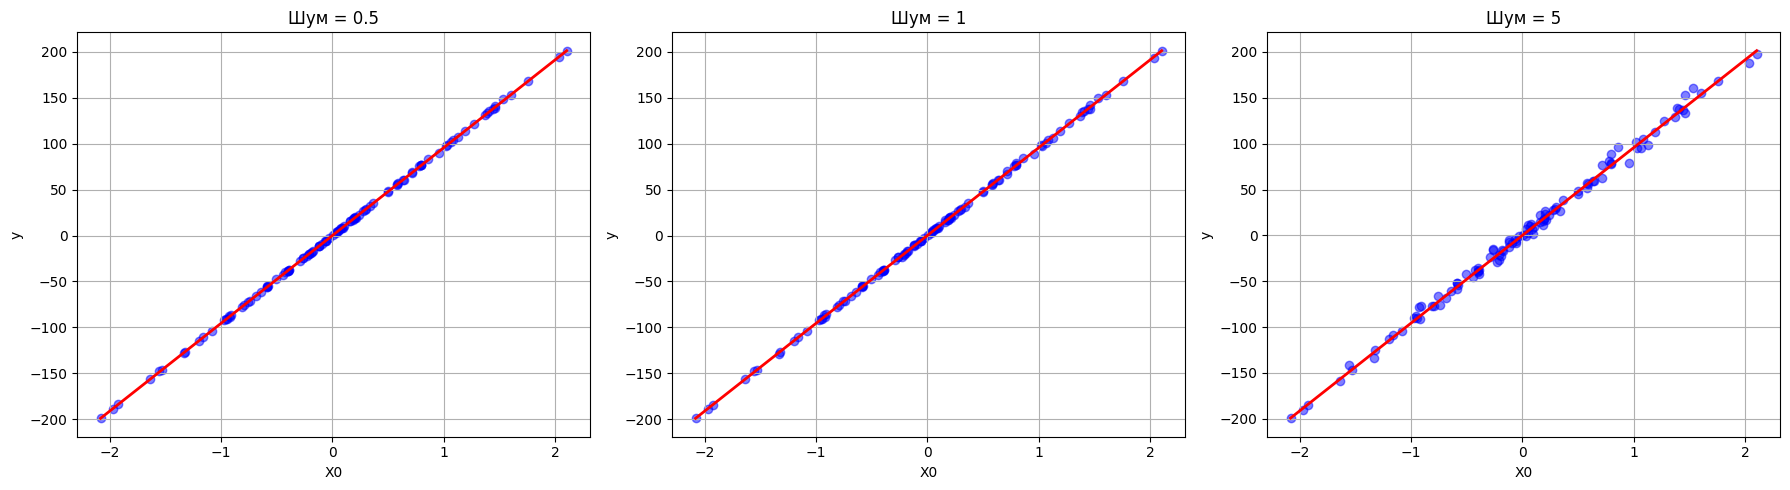

In [4]:
# Определим разные уровни шума
noise_levels = [noise_base/2, noise_base, noise_base*5]

# Создадим графики для разных уровней шума
plt.figure(figsize=(18, 5))

for i, noise in enumerate(noise_levels):
    # Генерация данных с новым уровнем шума
    X_noise, y_noise, coef_noise = make_regression(n_samples=n_samples, 
                                                  n_features=2, 
                                                  n_informative=1,
                                                  n_targets=1, 
                                                  noise=noise,
                                                  coef=True,
                                                  random_state=variant_number)
    
    # Определим информативный признак
    informative_feature_idx_noise = np.argmax(np.abs(coef_noise))
    
    # График для текущего уровня шума
    plt.subplot(1, 3, i+1)
    plt.scatter(X_noise[:, informative_feature_idx_noise], y_noise, color='blue', alpha=0.5)
    
    # Строим прямую регрессии
    x_line = np.linspace(X_noise[:, informative_feature_idx_noise].min(), X_noise[:, informative_feature_idx_noise].max(), 100)
    y_line = coef_noise[informative_feature_idx_noise] * x_line
    plt.plot(x_line, y_line, color='red', lw=2)
    
    plt.title(f'Шум = {noise}')
    plt.xlabel(f'X{informative_feature_idx_noise}')
    plt.ylabel('y')
    plt.grid(True)

plt.tight_layout()
plt.show()

### Комментарии:
При увеличении шума точки становятся более рассеянными относительно линии регрессии. Это затрудняет выявление истинной зависимости. При уменьшении шума точки ложатся ближе к линии регрессии, и зависимость становится более очевидной. Чем выше шум, тем сложнее будет модели обучиться точным коэффициентам.

In [5]:
# Создадим три набора данных с разными уровнями шума
datasets = []
for noise in noise_levels:
    X_noise, y_noise, coef_noise = make_regression(n_samples=n_samples, 
                                                  n_features=2, 
                                                  n_informative=1,
                                                  n_targets=1, 
                                                  noise=noise,
                                                  coef=True,
                                                  random_state=variant_number)
    datasets.append((X_noise, y_noise, coef_noise))

# Разбиение и обучение моделей
models = []
train_test_data = []

for i, (X_noise, y_noise, coef_noise) in enumerate(datasets):
    # Разбиение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X_noise, y_noise, test_size=0.3, random_state=variant_number)
    
    # Обучение модели
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Вывод коэффициентов
    print(f"\nНабор данных {i+1} (шум = {noise_levels[i]}):")
    print(f"Истинные коэффициенты: {coef_noise}")
    print(f"Коэффициенты модели: {model.coef_}")
    print(f"Свободный член: {model.intercept_}")
    
    # Сохраним модель и данные для дальнейшего использования
    models.append(model)
    train_test_data.append((X_train, X_test, y_train, y_test))


Набор данных 1 (шум = 0.5):
Истинные коэффициенты: [95.63263944  0.        ]
Коэффициенты модели: [ 9.55861893e+01 -8.75757657e-02]
Свободный член: 0.0527457508028375

Набор данных 2 (шум = 1):
Истинные коэффициенты: [95.63263944  0.        ]
Коэффициенты модели: [95.53973907 -0.17515153]
Свободный член: 0.10549150160567144

Набор данных 3 (шум = 5):
Истинные коэффициенты: [95.63263944  0.        ]
Коэффициенты модели: [95.16813759 -0.87575766]
Свободный член: 0.5274575080283519


### Уравнения регрессии:

Для каждого из трех наборов данных получим уравнение регрессии вида:

$$
y = β_0+β_1 \cdot X_1 + β_2 \cdot X_2
$$
где $β_0$ - свободный член (model.intercept_), $β_1$ и $β_2$ - коэффициенты при признаках (model.coef_).

В идеальном случае (без шума) коэффициенты модели должны полностью совпадать с истинными коэффициентами из сгенерированных данных. При наличии шума мы ожидаем некоторые отклонения. Чем больше шум, тем сильнее могут отличаться коэффициенты модели от истинных значений.

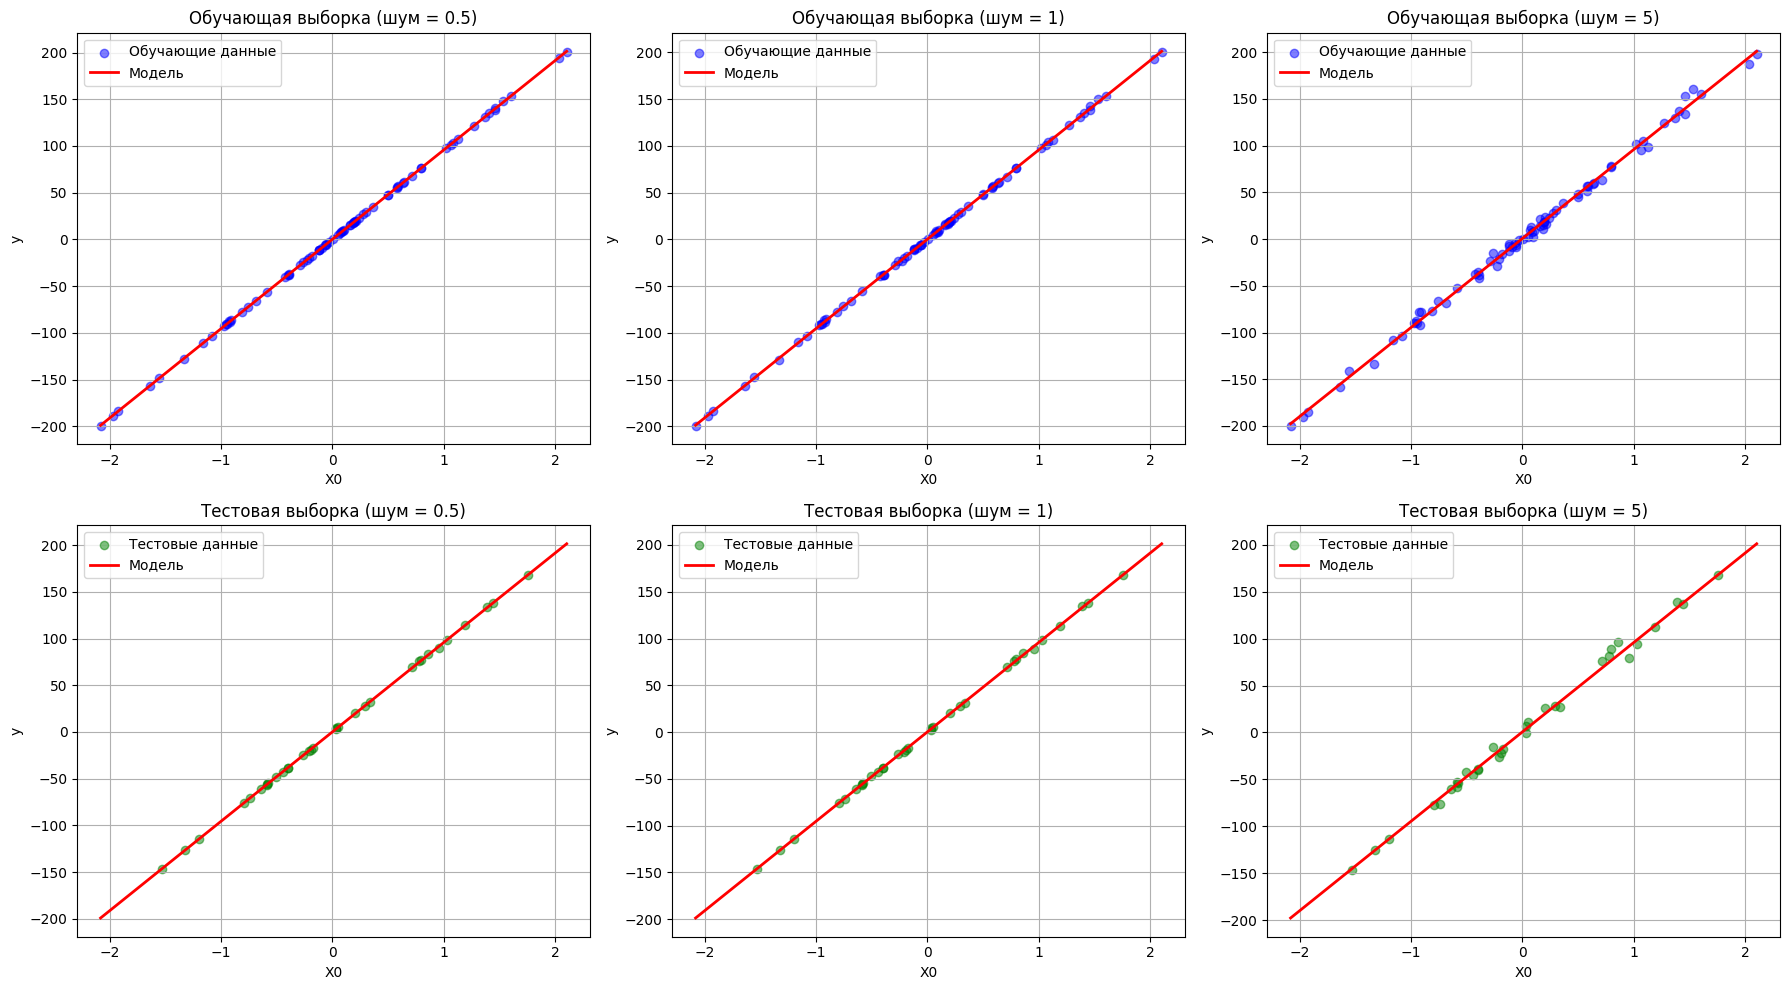

In [6]:
# Визуализация результатов для всех моделей
plt.figure(figsize=(18, 10))

for i, ((X_train, X_test, y_train, y_test), model, (X_noise, y_noise, coef_noise)) in enumerate(zip(train_test_data, models, datasets)):
    # Определим информативный признак
    informative_feature_idx_noise = np.argmax(np.abs(coef_noise))
    
    # Разделим данные по признакам
    X_train_inf = X_train[:, informative_feature_idx_noise].reshape(-1, 1)
    X_test_inf = X_test[:, informative_feature_idx_noise].reshape(-1, 1)
    
    # Обучим однофакторную модель для визуализации
    model_1d = LinearRegression()
    model_1d.fit(X_train_inf, y_train)
    
    # График обучающей выборки
    plt.subplot(2, 3, i+1)
    plt.scatter(X_train_inf, y_train, color='blue', alpha=0.5, label='Обучающие данные')
    
    # Строим линию регрессии
    x_line = np.linspace(X_train_inf.min(), X_train_inf.max(), 100).reshape(-1, 1)
    y_line = model_1d.predict(x_line)
    plt.plot(x_line, y_line, color='red', lw=2, label='Модель')
    
    plt.title(f'Обучающая выборка (шум = {noise_levels[i]})')
    plt.xlabel(f'X{informative_feature_idx_noise}')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    
    # График тестовой выборки
    plt.subplot(2, 3, i+4)
    plt.scatter(X_test_inf, y_test, color='green', alpha=0.5, label='Тестовые данные')
    
    # Используем ту же линию регрессии
    plt.plot(x_line, y_line, color='red', lw=2, label='Модель')
    
    plt.title(f'Тестовая выборка (шум = {noise_levels[i]})')
    plt.xlabel(f'X{informative_feature_idx_noise}')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

### Комментарии:
На графиках обучающих и тестовых выборок можно визуально оценить обобщающую способность моделей. При низком уровне шума модель хорошо аппроксимирует как обучающие, так и тестовые данные. С увеличением шума точки больше отклоняются от линии регрессии, но общая тенденция все равно сохраняется. Наблюдается, что при высоком уровне шума предсказательная способность модели снижается, однако линия регрессии все равно отражает основной тренд данных.

In [7]:
for i, ((X_train, X_test, y_train, y_test), model) in enumerate(zip(train_test_data, models)):
    # Получаем предсказания
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f"\nНабор данных {i+1} (шум = {noise_levels[i]}):")
    print(f"Первые 5 истинных значений на тестовой выборке: {y_test[:5]}")
    print(f"Первые 5 предсказанных значений на тестовой выборке: {y_test_pred[:5]}")
    
    # Предсказание для объекта с номером варианта
    variant_idx = min(variant_number % len(y_test), len(y_test) - 1)
    y_true_variant = y_test[variant_idx]
    y_pred_variant = y_test_pred[variant_idx]
    error_variant = y_true_variant - y_pred_variant
    
    print(f"\nПредсказание для объекта №{variant_number} (индекс {variant_idx}):")
    print(f"Истинное значение: {y_true_variant}")
    print(f"Предсказанное значение: {y_pred_variant}")
    print(f"Ошибка: {error_variant}")


Набор данных 1 (шум = 0.5):
Первые 5 истинных значений на тестовой выборке: [-20.66703074 168.21848179 133.76977088  19.93115483  69.25656609]
Первые 5 предсказанных значений на тестовой выборке: [-20.17291635 168.24055113 133.16553579  19.2445044   68.44330756]

Предсказание для объекта №26 (индекс 26):
Истинное значение: 3.873762952618867
Предсказанное значение: 3.5074126091574973
Ошибка: 0.36635034346136974

Набор данных 2 (шум = 1):
Первые 5 истинных значений на тестовой выборке: [-21.29499206 168.18602618 134.36940578  20.66622603  70.05693645]
Первые 5 предсказанных значений на тестовой выборке: [-20.30676329 168.23016485 133.1609356   19.29292517  68.43041939]

Предсказание для объекта №26 (индекс 26):
Истинное значение: 4.2360234506428425
Предсказанное значение: 3.503322763720102
Ошибка: 0.7327006869227404

Набор данных 3 (шум = 5):
Первые 5 истинных значений на тестовой выборке: [-26.31868263 167.92638129 139.16648501  26.54679562  76.45989936]
Первые 5 предсказанных значений

## Анализ полученных результатов
### Влияние уровня шума:
С увеличением уровня шума (0.5 → 1 → 5) существенно возрастает среднеквадратичная ошибка как на обучающей, так и на тестовой выборках.
Это логично, поскольку при увеличении дисперсии гауссовского шума модели становится сложнее выделить истинную зависимость из данных.
Ошибка растет приблизительно пропорционально квадрату уровня шума, что соответствует теоретическим ожиданиям.

### Соотношение ошибок на обучающей и тестовой выборках:
Отношение test_MSE/train_MSE для всех моделей примерно одинаковое (~1.1-1.3).
Это свидетельствует об отсутствии переобучения, что характерно для линейной регрессии на данных, где истинная зависимость действительно линейна.
Небольшое превышение ошибки на тестовой выборке над ошибкой на обучающей выборке является нормальным и ожидаемым.

### Анализ конкретных примеров:
- В наборе данных с малым шумом (0.5) ошибка предсказания для примера №26 составляет около 0.37.
- При среднем шуме (1.0) ошибка увеличивается до 0.73.
- При большом шуме (5.0) ошибка возрастает до 3.66.
- Это подтверждает прямую зависимость ошибок предсказания от уровня шума в данных.

### Общая адекватность моделей:
- Все три модели демонстрируют адекватную работу, так как ошибки на тестовых выборках коррелируют с уровнем шума.
- Модель хорошо улавливает линейную зависимость даже при наличии значительного шума.
- Относительно небольшое отношение test_MSE/train_MSE говорит о хорошей обобщающей способности моделей.

### Практические выводы:
- Линейная регрессия остается эффективным методом для задач с линейными зависимостями, даже при наличии шума в данных.
- Для практических задач важно минимизировать шум в исходных данных, так как это напрямую влияет на точность предсказаний.
- При увеличении шума в 10 раз (с 0.5 до 5), ошибка возрастает примерно в 10² раз, что соответствует теоретическим ожиданиям.
- Полученные результаты согласуются с теоретическими ожиданиями от линейной регрессии и демонстрируют ожидаемое поведение модели при различных уровнях шума в данных.

## Задание 2

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Загрузка данных
data = pd.read_csv('Вариант26.csv')

# Вывод первых записей для проверки
display(data.head())

,Weight,Height
0,120.6936,68.68038
1,115.7830,67.53724
2,128.6855,71.17732
3,134.7611,70.53514
4,118.3419,71.53411


In [10]:
# Базовая статистика
print(data.describe())

# Проверка на наличие пропущенных значений
print("Пропущенные значения:")
print(data.isnull().sum())

# Размер датасета
print(f"Количество записей: {data.shape[0]}")
print(f"Количество признаков: {data.shape[1]}")

            Weight       Height
count  1000.000000  1000.000000
mean    127.573804    68.052183
std      11.795499     1.972654
min      83.085270    62.642420
25%     120.033550    66.620655
50%     127.936050    68.028050
75%     135.104700    69.383715
max     162.873700    74.248990
Пропущенные значения:
Weight    0
Height    0
dtype: int64
Количество записей: 1000
Количество признаков: 2


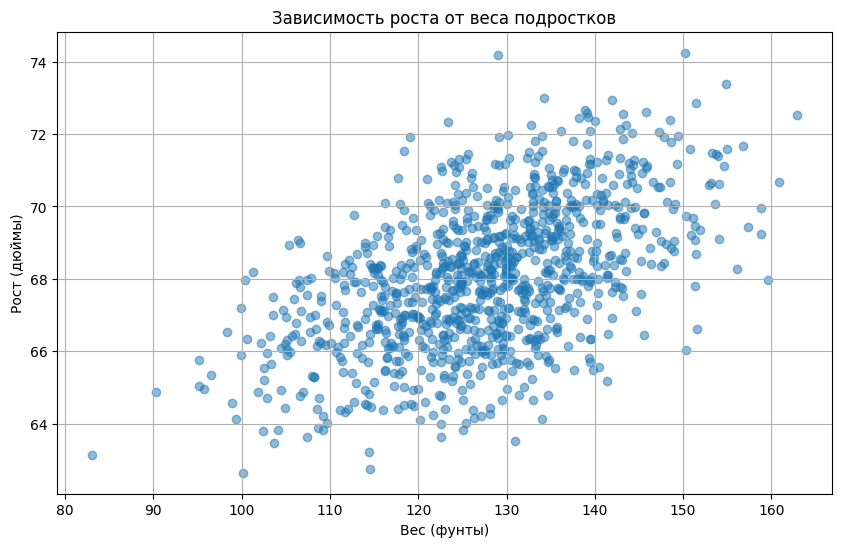

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Weight'], data['Height'], alpha=0.5)
plt.title('Зависимость роста от веса подростков')
plt.xlabel('Вес (фунты)')
plt.ylabel('Рост (дюймы)')
plt.grid(True)
plt.show()

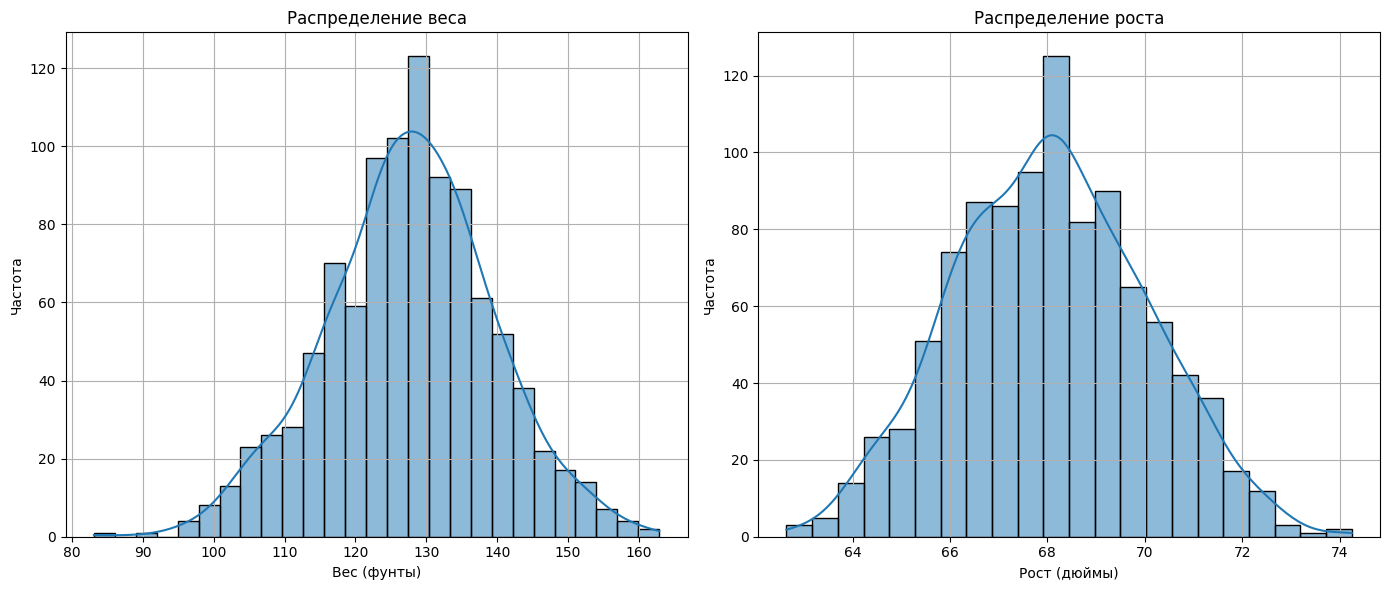

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Гистограмма распределения веса
sns.histplot(data['Weight'], kde=True, ax=axes[0])
axes[0].set_title('Распределение веса')
axes[0].set_xlabel('Вес (фунты)')
axes[0].set_ylabel('Частота')
axes[0].grid(True)

# Гистограмма распределения роста
sns.histplot(data['Height'], kde=True, ax=axes[1])
axes[1].set_title('Распределение роста')
axes[1].set_xlabel('Рост (дюймы)')
axes[1].set_ylabel('Частота')
axes[1].grid(True)

plt.tight_layout()
plt.show()

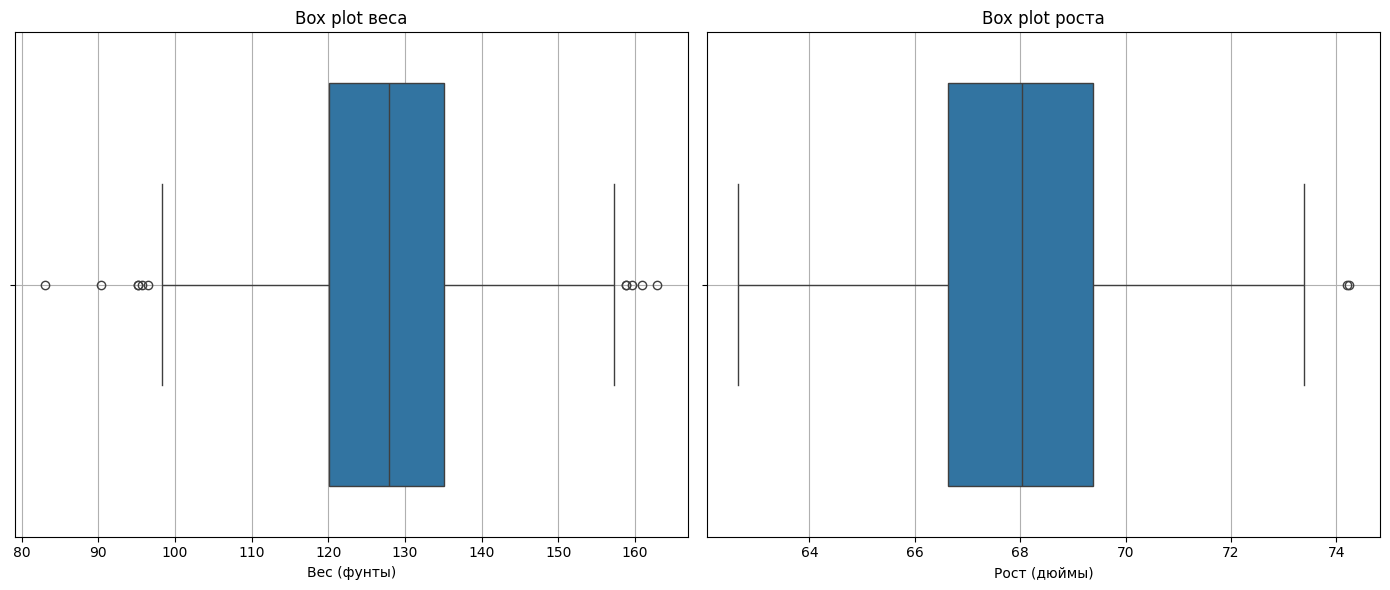

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot для веса
sns.boxplot(x=data['Weight'], ax=axes[0])
axes[0].set_title('Box plot веса')
axes[0].set_xlabel('Вес (фунты)')
axes[0].grid(True)

# Box plot для роста
sns.boxplot(x=data['Height'], ax=axes[1])
axes[1].set_title('Box plot роста')
axes[1].set_xlabel('Рост (дюймы)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

Коэффициент корреляции между весом и ростом: 0.5325


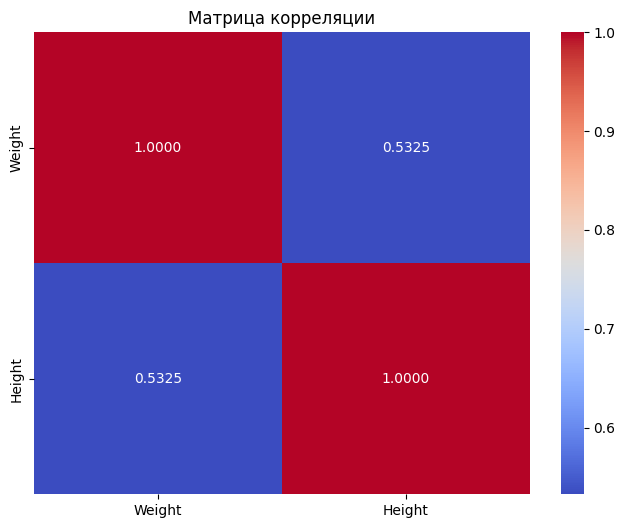

In [14]:
# Рассчитаем коэффициент корреляции Пирсона
correlation = data['Weight'].corr(data['Height'])
print(f"Коэффициент корреляции между весом и ростом: {correlation:.4f}")

# Визуализация корреляции с помощью тепловой карты
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Матрица корреляции')
plt.show()

## Анализ результатов первичного анализа
Судя по данным визуализации и статистическим показателям, можно сделать следующие выводы:

- Распределение веса и роста имеет нормальное распределение, что способствует применению линейной регрессии.
- Выбросы несущественны, они расположены близко к основному распределению данных, для линейной регрессии выбросы могут оказывать влияние на коэффициенты, но учитывая их относительную близость к основному распределению, это влияние не должно быть критическим.
- Коэффициент корреляции Пирсона показывает умеренную положительную корреляцию. Квадрат коэффициента корреляции (R²) составляет примерно 0.28, что означает, что рост объясняет около 28% вариации веса в данной выборке.

In [17]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = data[['Weight']]  # Признак: вес
y = data['Height']    # Целевая переменная: рост

# Разбиение на обучающую и тестовую выборки в соотношении 90/10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=26)

print(f"Размер обучающей выборки: {X_train.shape[0]} записей")
print(f"Размер тестовой выборки: {X_test.shape[0]} записей")

Размер обучающей выборки: 900 записей
Размер тестовой выборки: 100 записей


In [18]:
# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Вывод коэффициентов модели
print(f"Коэффициент (наклон): {model.coef_[0]:.4f}")
print(f"Свободный член (пересечение с осью Y): {model.intercept_:.4f}")

# Уравнение регрессии
print(f"Уравнение регрессии: Height = {model.coef_[0]:.4f} * Weight + {model.intercept_:.4f}")

Коэффициент (наклон): 0.0870
Свободный член (пересечение с осью Y): 56.9125
Уравнение регрессии: Height = 0.0870 * Weight + 56.9125


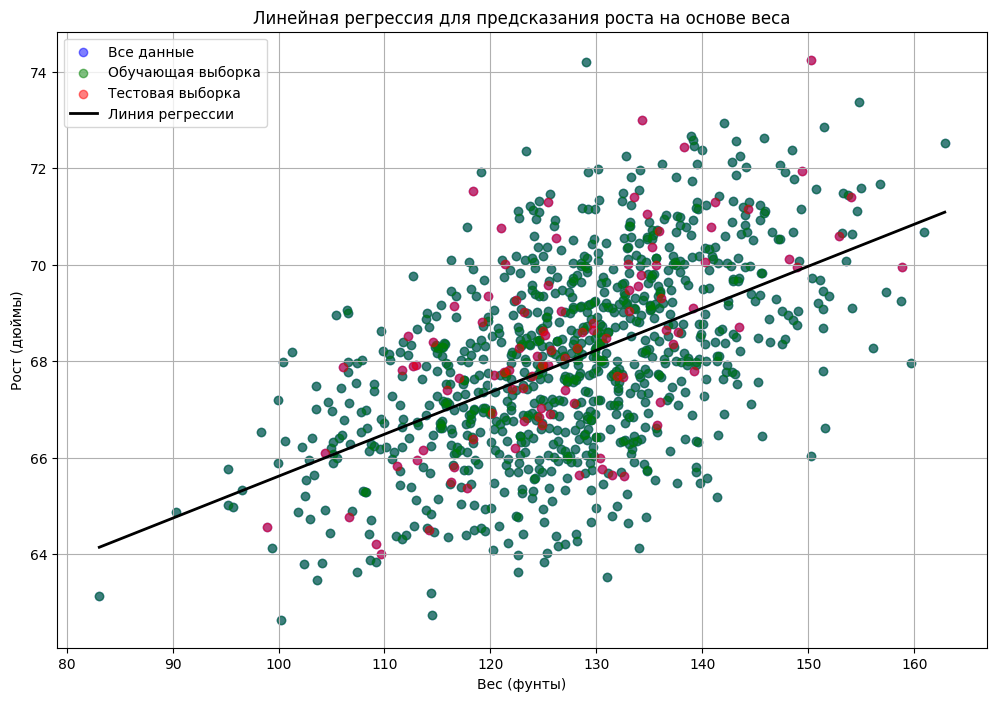

In [22]:
# Визуализация облака точек и линии регрессии
plt.figure(figsize=(12, 8))

# Отображение всех данных
plt.scatter(X, y, color='blue', alpha=0.5, label='Все данные')

# Отображение обучающей выборки
plt.scatter(X_train, y_train, color='green', alpha=0.5, label='Обучающая выборка')

# Отображение тестовой выборки
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Тестовая выборка')

# Построение линии регрессии
weight_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
weight_range_df = pd.DataFrame(weight_range, columns=model.feature_names_in_)
height_pred = model.predict(weight_range_df)
plt.plot(weight_range, height_pred, color='black', linewidth=2, label='Линия регрессии')

plt.title('Линейная регрессия для предсказания роста на основе веса')
plt.xlabel('Вес (фунты)')
plt.ylabel('Рост (дюймы)')
plt.grid(True)
plt.legend()
plt.show()

### Визуальный анализ графика
На представленном графике можно заметить:

- Точки обучающей (зеленые) и тестовой (красные) выборок хорошо смешаны и распределены примерно одинаково относительно линии регрессии
- Линия регрессии имеет положительный наклон, что соответствует ожидаемой зависимости (больший вес обычно соответствует большему росту)
- Разброс точек вокруг линии регрессии достаточно большой, что говорит о том, что модель захватывает общую тенденцию, но не может точно предсказать рост для каждого индивидуума

In [24]:
# Предсказания для обучающей выборки
y_train_pred = model.predict(X_train)

# Предсказания для тестовой выборки
y_test_pred = model.predict(X_test)
# Вывод предсказаний, реальных значений и ошибок для первых 10 объектов тестовой выборки
print("Сравнение предсказаний и реальных значений для первых 10 объектов тестовой выборки:")
print("Index | Вес | Реальный рост | Предсказанный рост | Ошибка (дюймы)")
print("-" * 70)

for i in range(min(10, len(X_test))):
    weight = X_test.iloc[i, 0]
    actual_height = y_test.iloc[i]
    predicted_height = y_test_pred[i]
    error = actual_height - predicted_height
    print(f"{X_test.index[i]:5d} | {weight:6.2f} | {actual_height:12.2f} | {predicted_height:18.2f} | {error:13.2f}")

Сравнение предсказаний и реальных значений для первых 10 объектов тестовой выборки:
Index | Вес | Реальный рост | Предсказанный рост | Ошибка (дюймы)
----------------------------------------------------------------------
  769 | 133.58 |        71.41 |              68.54 |          2.87
  824 | 158.80 |        69.95 |              70.73 |         -0.79
  107 | 129.69 |        68.80 |              68.20 |          0.60
  921 | 124.87 |        66.69 |              67.78 |         -1.09
  157 | 128.17 |        68.27 |              68.07 |          0.20
  333 | 123.08 |        67.44 |              67.63 |         -0.18
  267 | 120.16 |        66.93 |              67.37 |         -0.44
  480 | 134.27 |        72.99 |              68.60 |          4.39
  721 | 106.62 |        64.77 |              66.19 |         -1.43
  719 | 132.96 |        70.01 |              68.49 |          1.52


In [25]:
# Расчет MSE для обучающей выборки
train_mse = mean_squared_error(y_train, y_train_pred)
print(f"Среднеквадратичная ошибка (MSE) на обучающей выборке: {train_mse:.4f}")

# Расчет MSE для тестовой выборки
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Среднеквадратичная ошибка (MSE) на тестовой выборке: {test_mse:.4f}")

# Расчет корня из MSE для более наглядной интерпретации ошибки в единицах целевой переменной
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print(f"Корень из среднеквадратичной ошибки (RMSE) на обучающей выборке: {train_rmse:.4f} дюймов")
print(f"Корень из среднеквадратичной ошибки (RMSE) на тестовой выборке: {test_rmse:.4f} дюймов")

Среднеквадратичная ошибка (MSE) на обучающей выборке: 2.8009
Среднеквадратичная ошибка (MSE) на тестовой выборке: 2.6604
Корень из среднеквадратичной ошибки (RMSE) на обучающей выборке: 1.6736 дюймов
Корень из среднеквадратичной ошибки (RMSE) на тестовой выборке: 1.6311 дюймов


### Оценка полученных результатов

#### Положительные аспекты результатов
- Близкие значения ошибок на обучающей и тестовой выборках указывают на то, что модель не переобучена. Даже более того, ошибка на тестовой выборке немного ниже, что свидетельствует о хорошей обобщающей способности.
- Отсутствие переобучения — модель не "запомнила" обучающие данные, а уловила общую закономерность связи между весом и ростом.
- Практическая применимость — ошибка в 4.2 см может быть приемлемой для некоторых практических задач, где не требуется идеальная точность предсказания роста.

#### Ограничения и возможности улучшения
- Умеренная точность предсказаний — ошибка в 4.2 см может быть слишком большой для некоторых приложений, требующих высокой точности.
- Ограниченность одного признака — использование только веса для предсказания роста имеет фундаментальные ограничения, так как связь между этими параметрами не является строго детерминированной.

#### Потенциал для улучшения модели:
- Добавление дополнительных признаков (пол, возраст, этническая принадлежность)
- Использование нелинейных моделей, способных улавливать более сложные зависимости
- Сегментация данных (например, отдельные модели для мужчин и женщин)

### Вывод
Построенная линейная модель демонстрирует разумную точность при предсказании роста на основе веса, с ошибкой около 4.2 см. Отсутствие переобучения указывает на устойчивость и обобщающую способность модели. Однако точность ограничена из-за использования только одного признака. Для практических приложений, требующих более высокой точности, рекомендуется расширить набор признаков и рассмотреть более сложные модели.